In [3]:
#imports
import pandas as pd
import numpy as np
import os
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt 

In [4]:
#raw data path
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
print(raw_data_path)

..\data\raw


In [5]:
train_users_file = os.path.join(raw_data_path, 'train_users_2.csv')
test_users_file = os.path.join(raw_data_path, 'test_users.csv')
sessions_file = os.path.join(raw_data_path, 'sessions.csv')
countries_file = os.path.join(raw_data_path, 'countries.csv')
age_gender_file = os.path.join(raw_data_path, 'age_gender_bkts.csv')
train_users_df = pd.read_csv(train_users_file)
test_users_df = pd.read_csv(test_users_file)
sessions_df = pd.read_csv(sessions_file)
check_train_session = pd.read_csv(train_users_file)
countries_df = pd.read_csv(countries_file)
age_gender_df = pd.read_csv(age_gender_file)

In [5]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [6]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [6]:
sessions_df.head(10)
sessions_df.rename(columns={'user_id':'id'}, inplace=True)
sessions_df.head(10)

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [8]:
train_users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [7]:
#Session Data Available for training and test users
check_train_session=pd.merge(train_users_df,sessions_df,on='id', how='left')
print(len(train_users_df), len(train_users_df[(train_users_df['id'].isin(sessions_df['id']))]))
print(len(test_users_df), len(test_users_df[(test_users_df['id'].isin(sessions_df['id']))]))

213451 73815
62096 61668


In [22]:
age_gender_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [28]:
age_gender_df.describe(include = 'all')


,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,55-59,FR,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [30]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [33]:
train_users_df.describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,6ylkdc78qf,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
train_users_df['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

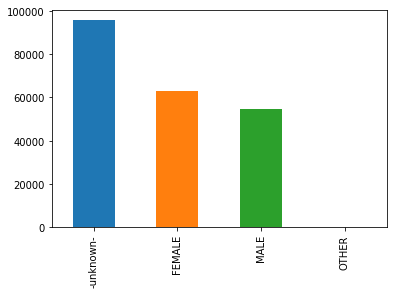

In [5]:
train_users_df.gender.value_counts().plot(kind='bar')

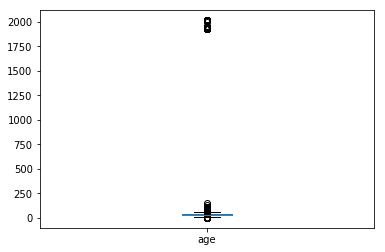

In [6]:
train_users_df.age.plot(kind='box')

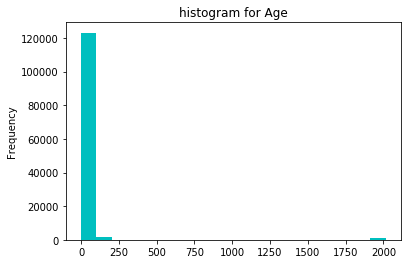

In [7]:
train_users_df.age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

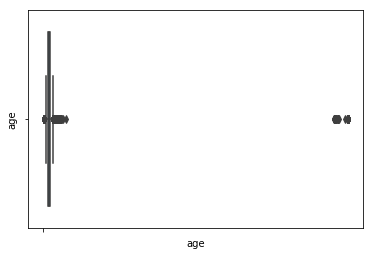

In [10]:
sns.stripplot(y='age', 
                   data=train_users_df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
sns.boxplot(x=train_users_df["age"])
#sns.swarmplot( y="age", data=train_users_df, color=".25")

In [10]:
train_users_df.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [12]:
train_users_df.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [14]:
train_users_df['signup_app'].unique()
train_users_df.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [16]:
train_users_df['signup_method'].unique()
train_users_df.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [19]:
train_users_df['signup_flow'].unique()
train_users_df.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [25]:
train_users_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
pd.to_datetime(train_users_df['date_account_created'])

0        2010-06-28
1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
5        2010-01-01
6        2010-01-02
7        2010-01-03
8        2010-01-04
9        2010-01-04
10       2010-01-04
11       2010-01-05
12       2010-01-05
13       2010-01-05
14       2010-01-07
15       2010-01-07
16       2010-01-07
17       2010-01-07
18       2010-01-08
19       2010-01-10
20       2010-01-10
21       2010-01-10
22       2010-01-11
23       2010-01-11
24       2010-01-11
25       2010-01-12
26       2010-01-12
27       2010-01-12
28       2010-01-13
29       2010-01-13
            ...    
213421   2014-06-30
213422   2014-06-30
213423   2014-06-30
213424   2014-06-30
213425   2014-06-30
213426   2014-06-30
213427   2014-06-30
213428   2014-06-30
213429   2014-06-30
213430   2014-06-30
213431   2014-06-30
213432   2014-06-30
213433   2014-06-30
213434   2014-06-30
213435   2014-06-30
213436   2014-06-30
213437   2014-06-30
213438   2014-06-30
213439   2014-06-30


In [28]:
train_users_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [9]:
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'])
train_users_df['date_first_booking'] = pd.to_datetime(train_users_df['date_first_booking'])
train_users_df['timestamp_first_active'] = pd.to_datetime(train_users_df['timestamp_first_active'])
train_users_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [10]:
train_users_df[train_users_df['date_account_created']>train_users_df['date_first_booking']]
#len(train_users_df[train_users_df['date_account_created']>train_users_df['date_first_booking']])

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
120,swrvyedlsp,2010-05-30,1970-01-01 05:35:00.218004109,2010-03-17,FEMALE,NaN,facebook,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
357,adq42kzmnv,2010-12-23,1970-01-01 05:35:00.405153524,2010-04-06,MALE,38.0,basic,2,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US
365,176898y1ju,2011-03-28,1970-01-01 05:35:00.406190210,2010-04-15,FEMALE,44.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US
599,8lfswd0jil,2010-05-20,1970-01-01 05:35:00.514221539,2010-05-16,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Android Phone,Chrome Mobile,US
897,bdm2l1azts,2012-04-20,1970-01-01 05:35:00.625004836,2011-05-18,FEMALE,47.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
933,7tik9xpgdw,2011-05-03,1970-01-01 05:35:00.629084950,2010-06-29,-unknown-,35.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
1182,ujd35792qs,2011-07-15,1970-01-01 05:35:00.726044253,2010-09-20,FEMALE,55.0,facebook,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,IT
1228,y20qfefzz8,2011-04-29,1970-01-01 05:35:00.729090514,2010-08-03,FEMALE,35.0,basic,8,en,direct,direct,untracked,Web,Windows Desktop,IE,DE


In [11]:
test_users_df['date_account_created'] = pd.to_datetime(test_users_df['date_account_created'])
test_users_df['date_first_booking'] = pd.to_datetime(test_users_df['date_first_booking'])
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'])
test_users_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
dtype: object

In [12]:
test_users_df[test_users_df['date_account_created']>test_users_df['date_first_booking']]
len(test_users_df[test_users_df['date_account_created']>test_users_df['date_first_booking']])

0

In [37]:
train_users_df.language.value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [15]:
pd.crosstab(train_users_df.language, train_users_df.country_destination)
#pd.crosstab(train_users_df.language, train_users_df.country_destination).plot(kind='bar');

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
language,,,,,,,,,,,,
ca,0,0,0,0,0,0,0,3,0,0,2,0
cs,0,0,0,1,0,0,0,23,0,0,6,2
da,0,0,0,2,0,0,1,39,0,0,14,2
de,3,1,24,7,10,5,6,462,2,1,193,18
el,0,0,0,2,1,0,0,18,0,0,2,1
en,531,1412,1016,2183,4882,2284,2763,119650,744,210,60845,9794
es,0,0,6,20,18,6,9,640,1,2,166,47
fi,0,0,0,0,1,0,0,7,0,0,5,1
fr,2,7,8,11,69,12,11,773,4,2,254,19


In [52]:
train_users_df[train_users_df['date_account_created']>datetime(2014, 1, 1)]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
422,oamfblpxdy,2014-01-15,1970-01-01 05:35:00.417172659,2014-01-15,OTHER,45.0,basic,24,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,US
710,5p0nmf3r6i,2014-05-23,1970-01-01 05:35:00.528140642,NaT,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
1025,dlg3a9x97v,2014-04-03,1970-01-01 05:35:00.712212924,NaT,MALE,47.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
4180,p4oev43bwu,2014-02-11,1970-01-01 05:35:10.412025420,2014-02-14,-unknown-,27.0,basic,0,en,sem-brand,google,untracked,Web,iPhone,-unknown-,US
4434,r6mv11jano,2014-01-29,1970-01-01 05:35:10.424111901,2014-03-17,-unknown-,26.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
4485,f3dnhnzzsq,2014-06-17,1970-01-01 05:35:10.426232029,2014-06-22,FEMALE,28.0,basic,0,en,direct,direct,untracked,Web,iPhone,Mobile Safari,US
7666,to4mnzr2sq,2014-05-29,1970-01-01 05:35:10.815225448,NaT,MALE,28.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF
12279,836nc10vsc,2014-02-23,1970-01-01 05:35:11.108211042,NaT,-unknown-,NaN,basic,0,en,other,facebook-open-graph,omg,Web,Mac Desktop,Safari,NDF
15393,i20tndjswt,2014-06-17,1970-01-01 05:35:20.117190402,2014-07-18,MALE,28.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
21538,tudiebtg0d,2014-05-31,1970-01-01 05:35:20.417080619,NaT,FEMALE,50.0,facebook,24,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF


In [16]:
train_users_df.groupby(['signup_method']).agg({'age' : 'mean'}) #Age have outlier so mean may be affected

,age
signup_method,
basic,58.177376
facebook,39.781394
google,34.843972


In [60]:
train_users_df.groupby(['signup_method']).age.median() #seemingly affected

signup_method
basic       34.0
facebook    33.0
google      32.0
Name: age, dtype: float64

In [64]:
train_users_df.groupby(['signup_method']).gender.value_counts()

signup_method  gender   
basic          -unknown-    93755
               FEMALE       32874
               MALE         26038
               OTHER          230
facebook       FEMALE       30135
               MALE         28333
               -unknown-     1488
               OTHER           52
google         -unknown-      445
               MALE            69
               FEMALE          32
Name: gender, dtype: int64

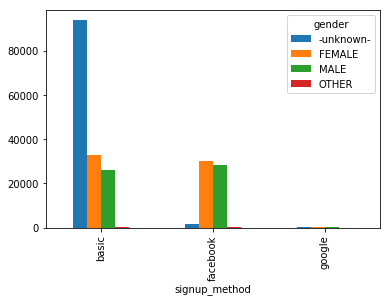

In [68]:
pd.crosstab(train_users_df.signup_method, train_users_df.gender).plot(kind='bar');

In [70]:
train_users_df.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

affiliate_provider   gender   
baidu                -unknown-       15
                     MALE             8
                     FEMALE           6
bing                 -unknown-     1129
                     FEMALE         764
                     MALE           434
                     OTHER            1
craigslist           -unknown-     1343
                     FEMALE        1159
                     MALE           963
                     OTHER            6
daum                 -unknown-        1
direct               -unknown-    63132
                     FEMALE       38797
                     MALE         35308
                     OTHER          189
email-marketing      -unknown-       96
                     FEMALE          36
                     MALE            34
facebook             FEMALE         846
                     MALE           730
                     -unknown-      693
                     OTHER            4
facebook-open-graph  FEMALE         257
         

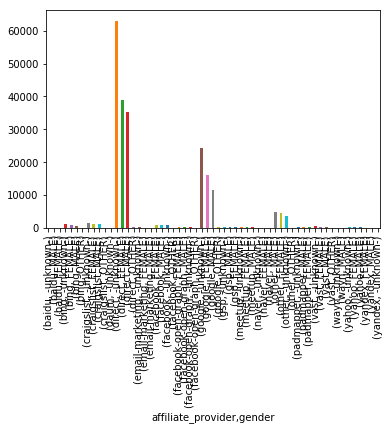

In [17]:
train_users_df.groupby(['affiliate_provider']).gender.value_counts().plot(kind='bar');
train_users_df.groupby(['affiliate_provider']).gender.value_counts()

In [82]:
countries_df.describe(include='all')

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
count,10,10.000000,10.000000,10.000000,1.000000e+01,10,10.00000
unique,10,NaN,NaN,NaN,NaN,7,NaN
top,GB,NaN,NaN,NaN,NaN,eng,NaN
freq,1,NaN,NaN,NaN,NaN,4,NaN
mean,NaN,39.799398,-4.262446,7181.897800,2.973734e+06,NaN,50.49900
std,NaN,24.739112,63.700585,3941.141734,4.329619e+06,NaN,44.54169
min,NaN,-26.853388,-96.818146,0.000000,4.154300e+04,NaN,0.00000
25%,NaN,39.639090,-6.737559,7001.557600,2.580425e+05,NaN,0.00000
50%,NaN,44.053092,-0.139014,7603.632650,4.311960e+05,NaN,67.91500
75%,NaN,51.891219,9.163386,7842.357000,5.966865e+06,NaN,91.39500


In [18]:
countries_df.head()
countries_df['country_destination'].unique()
countries_df.info()
countries_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [91]:
sessions_df.head()

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [19]:
sessions_df['action'].unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [97]:
sessions_df['action'].value_counts()

show                           2768278
index                           843699
search_results                  725226
personalize                     706824
search                          536057
ajax_refresh_subtotal           487744
update                          365130
similar_listings                364624
social_connections              339000
reviews                         320591
active                          188036
similar_listings_v2             168788
lookup                          162041
create                          155887
dashboard                       152952
header_userpic                  141830
collections                     124417
edit                            109083
campaigns                       105028
track_page_view                  81117
unavailabilities                 78317
qt2                              64651
notifications                    59392
confirm_email                    58726
requested                        57034
identity                 

In [24]:
sessions_df['action_detail'].unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', '-unknown-',
       'dashboard', 'create_user', 'confirm_email_link',
       'user_profile_content_update', 'user_profile', 'pending', 'p5',
       'create_phone_numbers', 'cancellation_policies', 'user_wishlists',
       'change_contact_host_dates', 'wishlist', 'message_thread',
       'request_new_confirm_email', 'send_message', 'your_trips',
       'login_page', 'login', 'login_modal', 'toggle_archived_thread',
       'p1', 'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'signup_modal',
       'signup_login_page', 'at_checkpoint', 'manage_listing',
       'create_listing', 'your_listings', 'profile_references',
       'list_your_space', 'popular_wishlists', 'listing_reviews_page',
    

In [25]:
sessions_df['action_detail'].value_counts()

view_search_results               1776885
p3                                1376550
-unknown-                         1031141
wishlist_content_update            706824
user_profile                       656839
change_trip_characteristics        487744
similar_listings                   364624
user_social_connections            336799
update_listing                     269779
listing_reviews                    269021
dashboard                          152952
user_wishlists                     152672
header_userpic                     141830
message_thread                     132395
edit_profile                       108686
message_post                        87103
contact_host                        81041
unavailable_dates                   77795
confirm_email_link                  58422
create_user                         54878
change_contact_host_dates           52517
user_profile_content_update         50434
user_reviews                        49665
p5                                

In [15]:
#Target Analysis
train_users_df.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

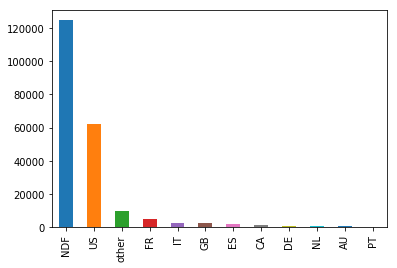

In [17]:
train_users_df.country_destination.value_counts().plot(kind='bar')

In [23]:
print("NDF %: ",100*(len(train_users_df[train_users_df['country_destination']=='NDF']) / len(train_users_df['country_destination'])))
print("US %: ",100*(len(train_users_df[train_users_df['country_destination']=='US']) / len(train_users_df['country_destination'])))
print("other %: ",100*(len(train_users_df[train_users_df['country_destination']=='other']) / len(train_users_df['country_destination'])))
print("FR %: ",100*(len(train_users_df[train_users_df['country_destination']=='FR']) / len(train_users_df['country_destination'])))
print("IT %: ",100*(len(train_users_df[train_users_df['country_destination']=='IT']) / len(train_users_df['country_destination'])))
print("GB %: ",100*(len(train_users_df[train_users_df['country_destination']=='GB']) / len(train_users_df['country_destination'])))
print("ES %: ",100*(len(train_users_df[train_users_df['country_destination']=='ES']) / len(train_users_df['country_destination'])))
print("CA %: ",100*(len(train_users_df[train_users_df['country_destination']=='CA']) / len(train_users_df['country_destination'])))
print("DE %: ",100*(len(train_users_df[train_users_df['country_destination']=='DE']) / len(train_users_df['country_destination'])))
print("NL %: ",100*(len(train_users_df[train_users_df['country_destination']=='NL']) / len(train_users_df['country_destination'])))
print("AU %: ",100*(len(train_users_df[train_users_df['country_destination']=='AU']) / len(train_users_df['country_destination'])))
print("PT %: ",100*(len(train_users_df[train_users_df['country_destination']=='PT']) / len(train_users_df['country_destination'])))


NDF %:  58.34734904029496
US %:  29.222631892097017
other %:  4.72895418620667
FR %:  2.3532332947608583
IT %:  1.3281736792050634
GB %:  1.0887744728298299
ES %:  1.05363760300959
CA %:  0.6690060013773652
DE %:  0.497069585056992
NL %:  0.3569905973736361
AU %:  0.2525169711081232
PT %:  0.10166267667989373


In [35]:
check_train_session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5677593 entries, 0 to 5677592
Data columns (total 21 columns):
id                         object
date_account_created       object
timestamp_first_active     int64
date_first_booking         object
gender                     object
age                        float64
signup_method              object
signup_flow                int64
language                   object
affiliate_channel          object
affiliate_provider         object
first_affiliate_tracked    object
signup_app                 object
first_device_type          object
first_browser              object
country_destination        object
action                     object
action_type                object
action_detail              object
device_type                object
secs_elapsed               float64
dtypes: float64(2), int64(2), object(17)
memory usage: 953.0+ MB


In [38]:
check_train_session[check_train_session['action_detail']=='instant_book'].country_destination.value_counts()

NDF      788
US       276
other     60
IT        28
GB        24
FR        15
ES        14
NL        13
PT         1
DE         1
Name: country_destination, dtype: int64

In [40]:
check_train_session[check_train_session['action_detail']=='translate_listing_reviews'].country_destination.value_counts()

NDF      171
FR       102
IT        54
US        39
other     32
ES        17
DE        16
GB        14
NL         9
CA         7
PT         3
Name: country_destination, dtype: int64

In [45]:
check_train_session[check_train_session['action_detail']=='contact_host'].country_destination.value_counts()

NDF      28065
US       19546
other     4294
FR        1573
IT         962
ES         713
GB         620
CA         431
DE         363
AU         182
NL         179
PT          40
Name: country_destination, dtype: int64

In [47]:
check_train_session[check_train_session['action_detail']=='user_friend_recommendations'].country_destination.value_counts()

NDF      107
US        47
other      5
CA         3
FR         2
IT         2
GB         1
Name: country_destination, dtype: int64

In [49]:
check_train_session[check_train_session['action_detail']=='apply_coupon_click_success'].country_destination.value_counts()

NDF      5
other    5
US       4
FR       2
NL       1
Name: country_destination, dtype: int64

In [50]:
check_train_session[check_train_session['action_detail']=='account_payment_methods'].country_destination.value_counts()

Series([], Name: country_destination, dtype: int64)

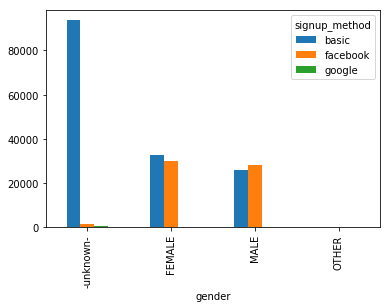

In [54]:
pd.crosstab(train_users_df.gender, train_users_df.signup_method).plot(kind='bar');

In [56]:
pd.crosstab(train_users_df.gender, train_users_df.country_destination)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


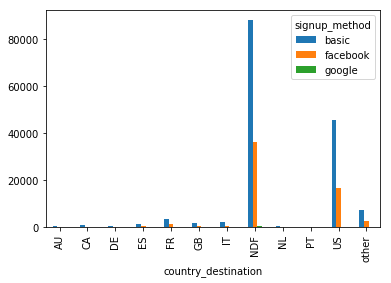

In [57]:
pd.crosstab(train_users_df.country_destination, train_users_df.signup_method).plot(kind='bar');

([<matplotlib.axis.YTick at 0x13b82cd7ac8>,
 <a list of 3 Text yticklabel objects>)

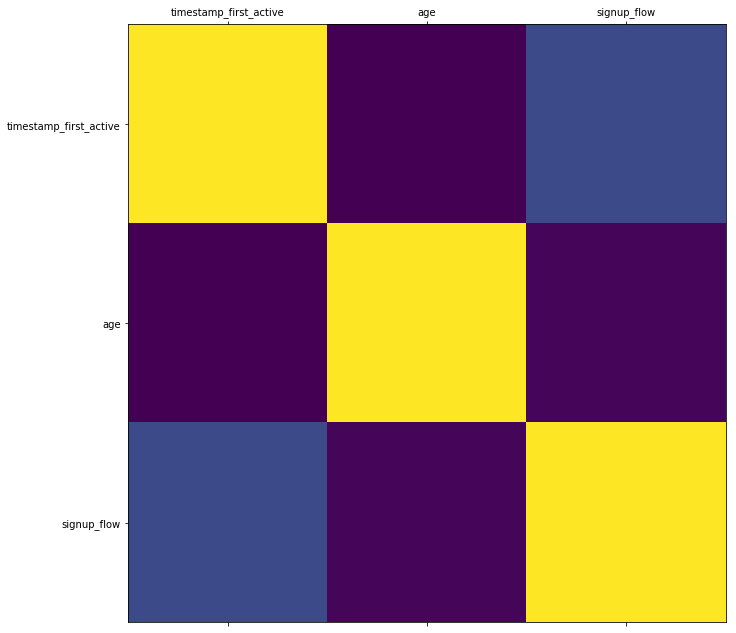

In [62]:
corr = train_users_df.corr()    # data frame correlation function
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)   # color code the rectangles by correlation value
plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
#redo this after all numerical

In [64]:
pd.crosstab(train_users_df.country_destination, train_users_df.first_browser)

first_browser,-unknown-,AOL Explorer,Android Browser,Apple Mail,Arora,Avant Browser,BlackBerry Browser,Camino,Chrome,Chrome Mobile,...,SeaMonkey,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,Yandex.Browser,wOSBrowser
country_destination,,,,,,,,,,,,,,,,,,,,,
AU,39,0,1,0,0,0,1,0,154,2,...,0,0,0,0,0,0,0,0,0,0
CA,98,1,3,0,0,0,0,0,486,5,...,1,1,0,0,0,0,0,0,0,0
DE,76,0,2,1,0,0,0,0,361,5,...,0,0,0,0,0,0,0,0,0,0
ES,158,1,5,0,0,0,0,0,755,5,...,0,0,0,0,0,0,0,0,0,0
FR,358,6,10,0,0,0,2,0,1535,14,...,0,1,1,0,0,0,0,1,0,0
GB,160,1,2,0,0,0,0,0,742,9,...,0,1,0,0,0,0,0,0,0,0
IT,190,3,4,1,0,0,2,0,897,10,...,0,1,0,0,0,0,0,0,0,0
NDF,19648,182,571,21,1,3,31,2,33968,862,...,7,81,17,1,24,0,4,0,10,3
NL,56,0,2,0,0,0,0,0,260,6,...,0,0,0,0,0,0,0,0,0,0


In [65]:
pd.crosstab(train_users_df.country_destination, train_users_df.first_device_type)

first_device_type,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone
country_destination,,,,,,,,,
AU,1,2,4,265,18,0,171,42,36
CA,13,11,18,679,49,0,520,78,60
DE,4,5,13,553,25,0,339,62,60
ES,13,11,11,1098,61,0,773,152,130
FR,17,23,24,2593,165,2,1576,356,267
GB,3,5,8,1197,52,0,764,159,136
IT,13,17,13,1379,57,1,969,225,161
NDF,2088,832,649,47350,7792,51,42564,8875,14342
NL,5,5,5,399,19,0,222,68,39


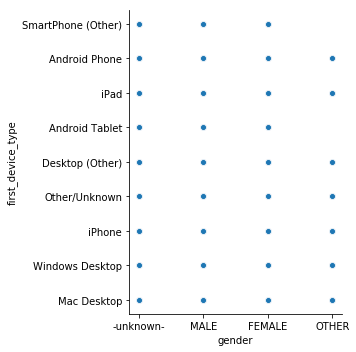

In [6]:
sns.relplot(y='first_device_type',x='gender', data=train_users_df)

In [17]:
len(train_users_df[train_users_df['age']<10])

57

In [18]:
100*(len(train_users_df[train_users_df['age']<10])/len(train_users_df['age']))

0.02670402106338223

In [16]:
train_users_df[train_users_df['age']>115].age.value_counts()

2014.0    710
2013.0     39
1932.0      3
1949.0      3
1931.0      3
1936.0      2
1947.0      2
1928.0      2
1929.0      2
1924.0      2
1933.0      1
1952.0      1
150.0       1
132.0       1
1938.0      1
1927.0      1
1995.0      1
1935.0      1
2008.0      1
1953.0      1
1926.0      1
1925.0      1
1942.0      1
Name: age, dtype: int64

In [19]:
len(train_users_df[train_users_df['age']>200])

779

In [25]:
train_users_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [20]:

train_users_df.affiliate_channel.value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

In [22]:

train_users_df.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [23]:
train_users_df.first_affiliate_tracked.value_counts()            

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [25]:
pd.crosstab(train_users_df.first_affiliate_tracked, train_users_df.country_destination)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_affiliate_tracked,,,,,,,,,,,,
linked,109,296,235,549,1087,508,551,26185,155,41,14288,2283
local ops,1,0,0,0,0,0,0,25,0,0,5,3
marketing,0,1,0,0,2,1,1,76,0,0,50,8
omg,119,268,201,423,1040,498,631,27557,158,45,11053,1989
product,4,10,3,11,28,6,30,1014,7,8,354,81
tracked-other,6,39,23,34,91,47,50,3866,11,4,1787,198
untracked,288,777,579,1196,2651,1235,1528,61493,420,116,33530,5419


In [26]:
pd.crosstab(train_users_df.first_affiliate_tracked, train_users_df.gender)

gender,-unknown-,FEMALE,MALE,OTHER
first_affiliate_tracked,,,,
linked,19214,14999,12014,60
local ops,9,13,12,0
marketing,45,51,43,0
omg,20394,13765,9764,59
product,753,430,371,2
tracked-other,2352,2089,1710,5
untracked,49016,30631,29433,152


In [2]:
sns.relplot(y='first_affiliate_tracked',x='country_destination',hue='gender', data=train_users_df)

NameError: name 'sns' is not defined

In [13]:
# Slight correlation between account_created_date and destination, checked by extracting the month but was lost

In [18]:
(train_users_df['date_account_created'] - train_users_df['timestamp_first_active']).max()

Timedelta('16250 days 18:24:19.369999')

In [20]:
train_users_df.signup_flow.value_counts()    

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [21]:
pd.crosstab(train_users_df.signup_flow, train_users_df.gender)

gender,-unknown-,FEMALE,MALE,OTHER
signup_flow,,,,
0,72101,50291,42136,211
1,406,343,287,11
2,2961,2146,1760,14
3,3219,2954,2628,21
4,0,0,1,0
5,3,21,12,0
6,158,70,72,1
8,104,68,67,1
10,1,1,0,0


In [22]:
pd.crosstab(train_users_df.signup_flow, train_users_df.country_destination)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_flow,,,,,,,,,,,,
0,433,1120,852,1772,4047,1902,2285,94845,601,177,48580,8125
1,1,5,1,5,4,3,6,878,4,0,121,19
2,24,88,55,105,268,78,116,3202,35,9,2626,275
3,28,99,77,172,361,152,201,3207,53,11,3896,565
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,34,0,0,2,0
6,1,2,0,8,13,3,3,137,4,2,109,19
8,1,3,4,8,7,3,13,129,4,1,50,17
10,0,0,0,0,0,0,0,1,0,0,1,0
